<div style="text-align: center;">
    <img src="https://media.gq.com/photos/59f0aa1cf964810d9a9b8f23/4:3/w_1024%2Cc_limit/1025-KickStarterMenswear_16x9.gif" width="500"/>
</div>



<link href="https://fonts.googleapis.com/css2?family=Poppins:wght@700&display=swap" rel="stylesheet"> 

<div style="text-align: center; background-color: #5AE78F; padding: 10px; border-radius: 7px;">
    <h1 style="color: black; font-family: 'Poppins', sans-serif; font-weight: bold; margin: 0;">
        ✨🤖.｡.*☆ Kickstarter Project: Predicting Funding Amount Using Machine Learning ✨🤖.｡.*☆
    </h1>
</div>
>
iv>


## **What is Kickstarter?**  
Kickstarter is an online crowdfunding platform where entrepreneurs, artists, and startups can present their ideas and raise funds from backers worldwide. Supporters pledge money to these projects, and if a project meets its funding goal within a set timeframe, it is successfully funded. In return, backers typically receive rewards, often the final product itself.  

## **How Does Kickstarter Work?**  
1. **Project Creation:** A creator sets a funding goal and deadline.  
2. **Support & Pledges:** People can pledge money to support the project.  
3. **All-or-Nothing Model:** If the funding goal is not met by the deadline, no money is collected, and backers are not charged.  


Since its launch, Kickstarter has helped fund over **200,000 projects**, raising more than **$5 billion**!

## **Categories & Accountability**  
- Kickstarter supports **15 different categories**, including music, technology, food, and design.  
- Creators are encouraged to be transparent about their projects, providing progress updates, identifying challenges, and engaging with backers.

<br>
n  


<a class="anchor"  id="1"></a>
# 1- Imported Libraries 🌀

In [260]:
#For Data visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from itertools import product
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [261]:
data_df=pd.read_csv('DAI_kickstarterscrape_dataset.csv', encoding = 'latin1')

In [262]:
data_df.head(5)

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.00,11545.00,1.10,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.00,20.00,0.01,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.00,56.00,0.00,3,"Fri, 08 Jun 2012 00:00:31 -0000",10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.00,6535.00,1.09,100,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.00,0.00,0.00,0,"Wed, 01 Jun 2011 15:25:39 -0000",6,"$10,$25,$50,$100,$150,$250",2,0,30.00


| Column Name         | Description |
|---------------------|-------------|
| project id         | A unique identifier for the Kickstarter project. |
| name              | The title of the Kickstarter project. |
| url               | The link to the project's Kickstarter page. |
| category          | The main category under which the project falls (e.g., Film & Video, Technology, Music, etc.). |
| subcategory       | The specific subcategory within the main category (e.g., Short Film, Documentary, Tabletop Games). |
| location         | The city and state where the project is based. |
| status           | The current state of the project (e.g., successful, failed, live, canceled). |
| goal             | The fundraising goal set by the creator in USD. |
| pledged          | The total amount of money pledged by backers in USD. |
| funded percentage | The percentage of the goal that was achieved (pledged amount ÷ goal). |
| backers          | The number of people who pledged money to support the project. |
| funded date      | The date and time when the project was successfully funded. |
| levels           | The number of reward levels offered to backers. |
| reward levels    | The specific pledge amounts required to receive rewards (e.g., $25, $50, $100, etc.). |
| updates          | The number of updates posted by the project creator to inform backers of progress. |
| comments         | The number of comments made by backers or supporters on the project page. |
| duration         | The total length of the Kickstarter campaign in days. |



<a class="anchor"  id="2"></a>
# 2- Data Exploration (EDA) 🔎

In [265]:
data_df.shape

(45957, 17)

In [266]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45957 entries, 0 to 45956
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   project id         45957 non-null  int64  
 1   name               45957 non-null  object 
 2   url                45957 non-null  object 
 3   category           45957 non-null  object 
 4   subcategory        45957 non-null  object 
 5   location           44635 non-null  object 
 6   status             45957 non-null  object 
 7   goal               45957 non-null  float64
 8   pledged            45945 non-null  float64
 9   funded percentage  45957 non-null  float64
 10  backers            45957 non-null  int64  
 11  funded date        45957 non-null  object 
 12  levels             45957 non-null  int64  
 13  reward levels      45898 non-null  object 
 14  updates            45957 non-null  int64  
 15  comments           45957 non-null  int64  
 16  duration           459

In [267]:
data_df = data_df.drop_duplicates()

In [268]:
data_df.duplicated().sum()  # should be zeros now!

0

Do we need all the columns?
- ID, url and Name columns are unique identifier and are not used in the ml, drop them.
- convert funded date into datetime format 

In [270]:
data_df = data_df.drop(['url', 'name'], axis=1)

In [271]:
data_df.head()

,project id,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
0,39409,Film & Video,Short Film,"Columbia, MO",successful,10500.00,11545.00,1.10,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00
1,126581,Games,Board & Card Games,"Maplewood, NJ",failed,4000.00,20.00,0.01,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18
2,138119,Film & Video,Animation,"Los Angeles, CA",live,20000.00,56.00,0.00,3,"Fri, 08 Jun 2012 00:00:31 -0000",10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00
3,237090,Film & Video,Documentary,"Los Angeles, CA",successful,6000.00,6535.00,1.09,100,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22
4,246101,Fashion,Fashion,"Novi, MI",failed,3500.00,0.00,0.00,0,"Wed, 01 Jun 2011 15:25:39 -0000",6,"$10,$25,$50,$100,$150,$250",2,0,30.00


In [272]:
data_df['location'].unique()

array(['Columbia, MO', 'Maplewood, NJ', 'Los Angeles, CA', ...,
       'Osage, IA', 'Lake Oswego, OR', 'Celebration, FL'], dtype=object)

The problem with this column is with the data entering, having a state code and the city seperated would be more useful

In [274]:
# split the location column into state and location
data_df[['state', 'city']] = data_df['location'].str.split(',', n=1, expand=True)

In [275]:
#Convert (goal, pledged, and backers) columns to numeric
data_df['goal'] = pd.to_numeric(data_df['goal'], errors='coerce')
data_df['pledged'] = pd.to_numeric(data_df['pledged'], errors='coerce')
data_df['backers'] = pd.to_numeric(data_df['backers'], errors='coerce')

In [276]:
#Check the previous steps
data_df.dtypes

project id             int64
category              object
subcategory           object
location              object
status                object
goal                 float64
pledged              float64
funded percentage    float64
backers                int64
funded date           object
levels                 int64
reward levels         object
updates                int64
comments               int64
duration             float64
state                 object
city                  object
dtype: object

In [277]:
print('Number of null') 
print(data_df.isnull().sum())
print('-'*100)
print('Rate of null in each cols')
print(data_df.isnull().sum() / len(data_df) * 100)

Number of null
project id              0
category                0
subcategory             0
location             1321
status                  0
goal                    0
pledged                12
funded percentage       0
backers                 0
funded date             0
levels                  0
reward levels          59
updates                 0
comments                0
duration                0
state                1321
city                 1322
dtype: int64
----------------------------------------------------------------------------------------------------
Rate of null in each cols
project id          0.00
category            0.00
subcategory         0.00
location            2.88
status              0.00
goal                0.00
pledged             0.03
funded percentage   0.00
backers             0.00
funded date         0.00
levels              0.00
reward levels       0.13
updates             0.00
comments            0.00
duration            0.00
state               2.88
cit

<h4 style="text-align:center;">This data's null is about 
    <span style="color:red; font-size:20px;">only 2.88% or less.</span>
</h4>
<h4 style="text-align:center; color:red;">
    It would be convenient to drop all nulls without violating our dataset's integrity.
</h4>
</h4>

</h4>

In [279]:
data_df_dropna = data_df.dropna()
# Just get rid of the nulls
print('Number of null')
print(data_df_dropna.isnull().sum())
print('-'*100)
print('Null percentage')
print(data_df_dropna.isnull().sum() / len(data_df_dropna) * 100)

Number of null
project id           0
category             0
subcategory          0
location             0
status               0
goal                 0
pledged              0
funded percentage    0
backers              0
funded date          0
levels               0
reward levels        0
updates              0
comments             0
duration             0
state                0
city                 0
dtype: int64
----------------------------------------------------------------------------------------------------
Null percentage
project id          0.00
category            0.00
subcategory         0.00
location            0.00
status              0.00
goal                0.00
pledged             0.00
funded percentage   0.00
backers             0.00
funded date         0.00
levels              0.00
reward levels       0.00
updates             0.00
comments            0.00
duration            0.00
state               0.00
city                0.00
dtype: float64


<div style="text-align: center;">
    <img src="https://media.tenor.com/2rAuZWSTScQAAAAM/neat-camera.gif" alt="Neat Camera GIF">
</di>

<h2 style="background-color:lightblue;padding:15px; text-align:center"> Now lets have some visuals to explore the datasets and get some insights</h2>

Text(0, 0.5, 'Projects')

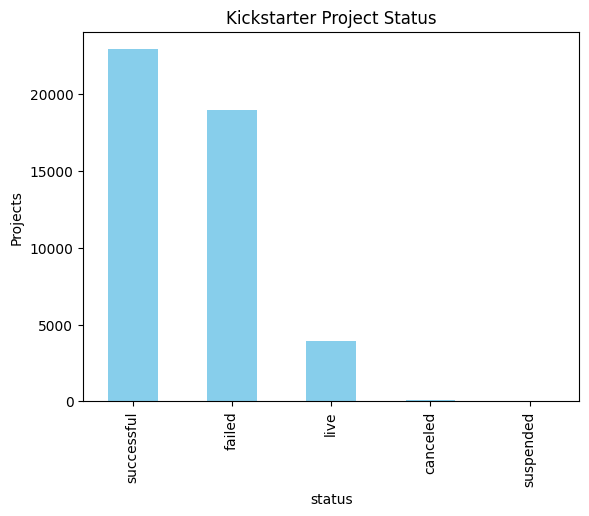

In [282]:
#Distribution of project status
data_df['status'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Kickstarter Project Status')
plt.ylabel('Projects')

In this dataset, the plurality of projects  are successful, a significant amount of projects were failed, and the remaining numbers are live.

Text(0, 0.5, 'Projects')

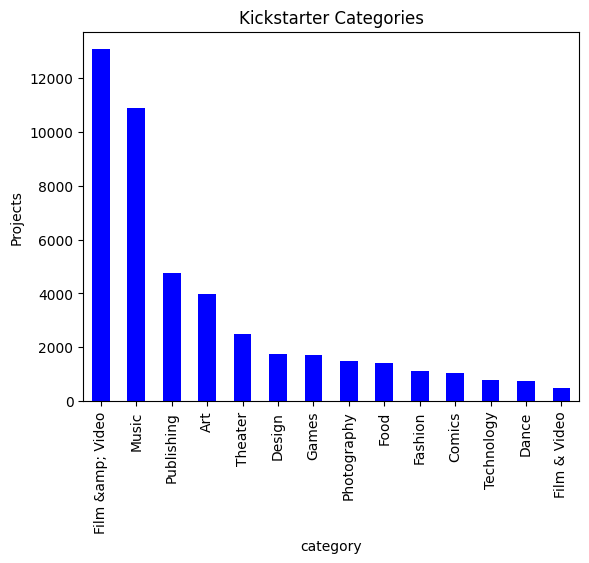

In [284]:
#Distribution of main categories
data_df['category'].value_counts().plot(kind='bar', color='blue')
plt.title('Kickstarter Categories')
plt.ylabel('Projects')

Film&video, Music, Publishing are the most projects attracts attention, such innovatos projects just needed creativity. Unlike technology, such a projects is challinging and require high probability of failing, and needs expensive materials. 

<h2 style="background-color:lightblue;padding:15px; text-align:center"> How can we sense the success of a project? a measure?</h2>

In [287]:
#Lets see the distribution of goals
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data_df['goal'].describe()

count      45868.00
mean       11955.47
std       188940.97
min            0.01
25%         1800.00
50%         4000.00
75%         9906.50
max     21474836.47
Name: goal, dtype: float64

The Kickstarter project goal distribution is highly right-skewed, with a wide range of values and significant variability, indicated by a large standard deviation; So, the median is more representative due to the presence of extreme outliers.

In [289]:
data_df['pledged'].describe()

count      45856.00
mean        4983.98
std        56796.21
min            0.00
25%          195.00
50%         1310.00
75%         4160.00
max     10266845.00
Name: pledged, dtype: float64

Hmmm.It would be more representable to just calculate the success ratio of each project by:
ratio=pledged/goal

In [291]:
status_ratio = data_df.groupby('status').agg({'pledged': "mean", 'goal': "mean"})
status_ratio['ratio'] = status_ratio['pledged'] / status_ratio['goal']

C:\Users\ragha\AppData\Local\Temp\ipykernel_19296\765238653.py:1: FutureWarning: The provided callable <function mean at 0x000001A6BC25A980> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  category_ratio= data_df.groupby('category').agg({'pledged': np.mean, 'goal': np.mean})
C:\Users\ragha\AppData\Local\Temp\ipykernel_19296\765238653.py:1: FutureWarning: The provided callable <function mean at 0x000001A6BC25A980> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  category_ratio= data_df.groupby('category').agg({'pledged': np.mean, 'goal': np.mean})


Text(0, 0.5, 'Success Ratio')

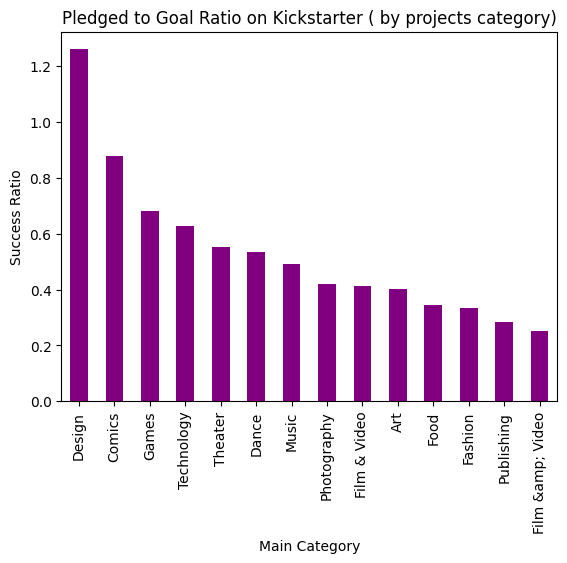

In [292]:
category_ratio= data_df.groupby('category').agg({'pledged': np.mean, 'goal': np.mean})
category_ratio['ratio'] = category_ratio['pledged'] / category_ratio['goal']
category_ratio['ratio'].sort_values(ascending=False).plot(kind='bar', color='purple')
plt.title('Pledged to Goal Ratio on Kickstarter ( by projects category)')
plt.xlabel('Main Category')
plt.ylabel('Success Ratio')

Text(0, 0.5, 'Ratio')

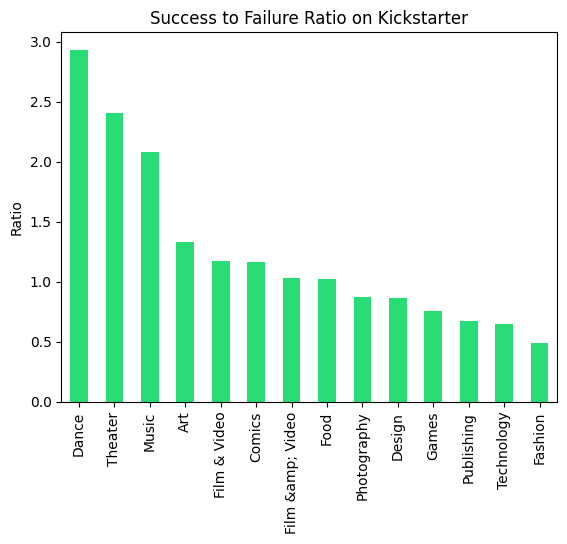

In [293]:
category_status =data_df.pivot_table(index='category', columns='status', values='project id',aggfunc='count')
category_status['WLratio'] = category_status['successful'] / category_status['failed']
category_status['WLratio'].sort_values(ascending=False).plot(kind='bar', color='#2ADC75')
plt.title('Success to Failure Ratio on Kickstarter')
plt.xlabel('')
plt.ylabel('Ratio')

In [294]:
category_status =data_df.pivot_table(index='category', columns='status', values='project id',aggfunc='count')
category_status['total'] = category_status.sum(axis=1)
#Percentages of grand total, to visuilize the status across each category
for column in category_status.columns[:5]:
    category_status[column] = category_status[column] / category_status['total']

Text(0, 0.5, 'Percentage of Projects')

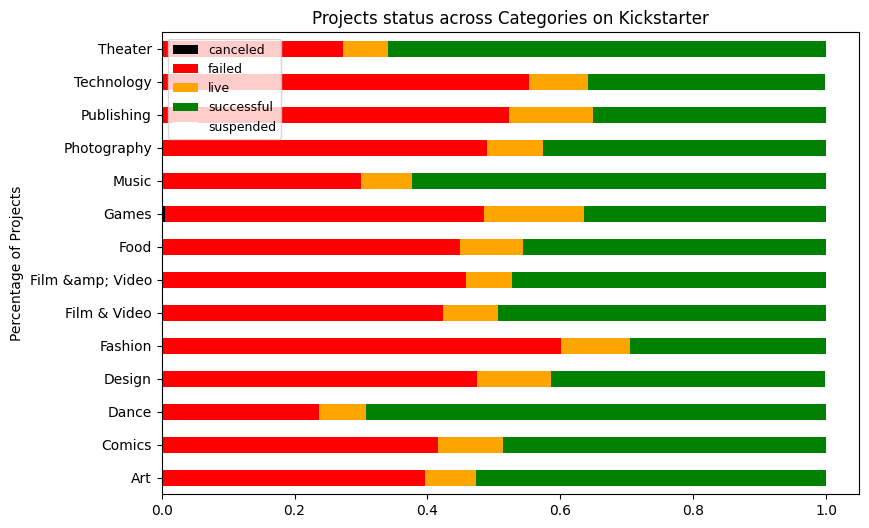

In [295]:
#Plot the frequencies of the status of each category to sense status per catogery
category_status.iloc[:,:5].plot(kind='barh', stacked=True, figsize=(9,6), 
                         color=['black', 'red', 'orange','green', 'white'])
plt.title('Projects status across Categories on Kickstarter')
plt.legend(loc=2, prop={'size': 9})
plt.xlabel('')
plt.ylabel('Percentage of Projects')

In [252]:
#add a new measure to the datasets
data_df['pledge to goal ratio'] = status_ratio['pledged'] / status_ratio['goal']
#note: this is similar to funded percentage but the original columns has many issues with the values, so we will replace it with this column measure

In [326]:
data_df = data_df.drop(['project id', 'funded percentage'], axis=1)


<a class="anchor"  id="4"></a>
# 4- Data Preprocessing ⚙️

In [328]:
data_df.head()

,category,subcategory,location,status,goal,pledged,backers,funded date,levels,reward levels,updates,comments,duration,state,city
0,Film & Video,Short Film,"Columbia, MO",successful,10500.00,11545.00,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00,Columbia,MO
1,Games,Board & Card Games,"Maplewood, NJ",failed,4000.00,20.00,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18,Maplewood,NJ
2,Film & Video,Animation,"Los Angeles, CA",live,20000.00,56.00,3,"Fri, 08 Jun 2012 00:00:31 -0000",10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00,Los Angeles,CA
3,Film & Video,Documentary,"Los Angeles, CA",successful,6000.00,6535.00,100,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22,Los Angeles,CA
4,Fashion,Fashion,"Novi, MI",failed,3500.00,0.00,0,"Wed, 01 Jun 2011 15:25:39 -0000",6,"$10,$25,$50,$100,$150,$250",2,0,30.00,Novi,MI


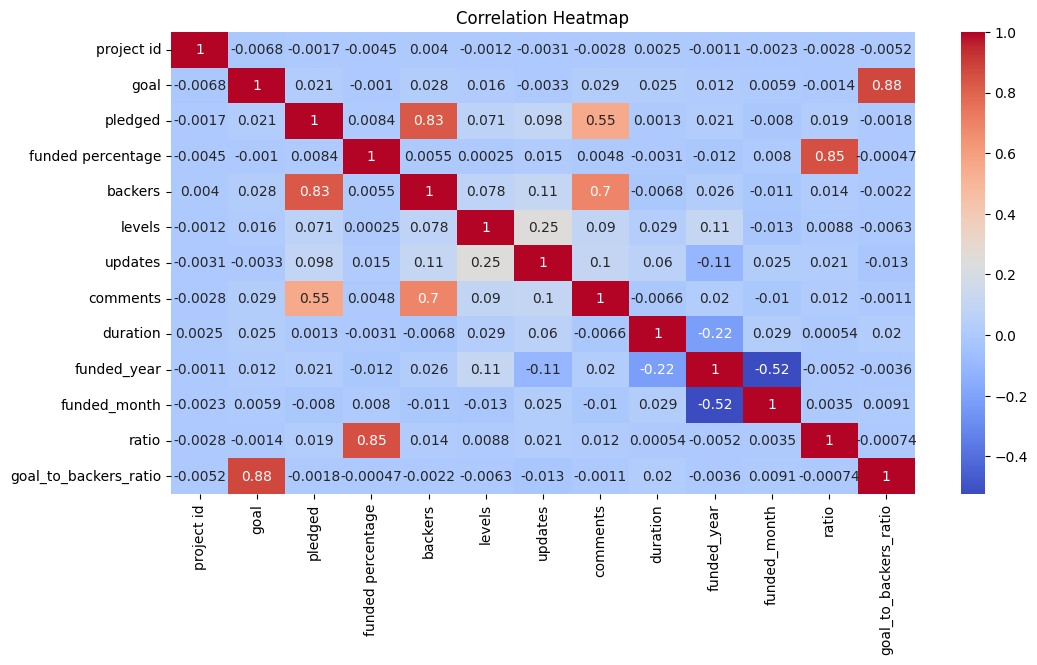

In [610]:
plt.figure(figsize=(12, 6))
sns.heatmap(data_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [388]:
new_df = data_df[['category','goal','pledged','duration','city','backers']]
new_df.dropna(subset=['pledged','city'],inplace=True)
new_df.head(5)

C:\Users\ragha\AppData\Local\Temp\ipykernel_19296\3314593774.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.dropna(subset=['pledged','city'],inplace=True)


,category,goal,pledged,duration,city,backers
0,Film & Video,10500.00,11545.00,30.00,MO,66
1,Games,4000.00,20.00,47.18,NJ,2
2,Film & Video,20000.00,56.00,28.00,CA,3
3,Film & Video,6000.00,6535.00,32.22,CA,100
4,Fashion,3500.00,0.00,30.00,MI,0


In [390]:
new_df.isnull().sum()

category    0
goal        0
pledged     0
duration    0
city        0
backers     0
dtype: int64

In [392]:
processed_feature_names = num_attribs + cat_attribs  # Ensuring column names match
ts_df = pd.DataFrame(new_X_train, columns=processed_feature_names)
#ts_df = pd.DataFrame(df_prepared,columns=new_df.columns)
ts_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
goal,36684.00,-0.00,1.00,-0.06,-0.05,-0.04,-0.01,101.85
duration,36684.00,-0.00,1.00,-2.23,-0.57,-0.46,0.47,2.98
category,36684.00,7.07,3.46,0.00,6.00,7.00,9.00,13.00
city,35634.00,90.11,54.22,0.00,24.00,94.00,120.00,194.00


In [394]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('std_scaler', StandardScaler()),
    ])
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

num_attribs = ['goal','duration']
cat_attribs = ['category','city']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OrdinalEncoder(), cat_attribs),
    ])

df_prepared = full_pipeline.fit_transform(new_df)
# Define features and target
features = ['category','goal','duration','city','backers']
target= ['pledged']

# Split data
X = new_df[features]
y = new_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

new_X_train = full_pipeline.fit_transform(X_train)
new_X_test = full_pipeline.fit_transform(X_test)

In [398]:
processed_feature_names = num_attribs + cat_attribs  # Ensuring column names match
ts_df = pd.DataFrame(new_X_train, columns=processed_feature_names)
#ts_df = pd.DataFrame(df_prepared,columns=new_df.columns)
ts_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
goal,35627.00,0.00,1.00,-0.08,-0.07,-0.05,-0.01,141.72
duration,35627.00,0.00,1.00,-2.25,-0.56,-0.47,0.43,3.05
category,35627.00,7.06,3.47,0.00,6.00,7.00,9.00,13.00
city,35627.00,92.15,55.08,0.00,25.00,97.00,122.00,197.00


In [400]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(new_X_train,y_train)

LinearRegression()

In [402]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(new_X_train,y_train)

LinearRegression()

In [404]:
y_pred = lin_reg.predict(new_X_test)
y_pred

array([[6641.07546616],
       [6350.75370007],
       [5879.78794516],
       ...,
       [4689.4771995 ],
       [4214.83519649],
       [5608.28951766]])

In [406]:
error = ((y_pred / y_test.values)-1)*100
error

C:\Users\ragha\AppData\Local\Temp\ipykernel_19296\3413536290.py:1: RuntimeWarning: divide by zero encountered in divide
  error = ((y_pred / y_test.values)-1)*100


array([[ 1.32721509e+05],
       [ 1.80450106e+04],
       [ 4.79982329e+03],
       ...,
       [-1.58083088e+01],
       [            inf],
       [ 3.83473234e+02]])

In [408]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(new_X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [410]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
df_predictions = tree_reg.predict(new_X_test)
tree_mse = mean_squared_error(y_test, df_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

41860.47358975523